<a href="https://colab.research.google.com/github/YoonHyeJu/Python_ML_Guide/blob/master/%EB%A6%BF%EC%A7%80_%EB%9D%BC%EC%8F%98_%EC%97%98%EB%9D%BC%EC%8A%A4%ED%8B%B1%EB%84%B7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

In [2]:
# dataset load
boston = load_boston()

In [3]:
# dataset change to DataFrame
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)

In [4]:
# boston 데이터 세트의 target 배영을 주택 가격. 이를 Price 칼럼으로 dataframe에 추가.
bostonDF['PRICE'] = boston.target

In [5]:
y_target = bostonDF["PRICE"]
x_data = bostonDF.drop(["PRICE"], axis=1, inplace=False)

# **릿지 회기**

In [6]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

In [8]:
# alpha = 10으로 설정
ridge = Ridge(alpha=10)
neg_mse_scores = cross_val_score(ridge, x_data, y_target, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

In [9]:
print('5 folds의 개별 Negative MSE scores: ', np.round(neg_mse_scores,3))
print('5 folds의 개별 RMSE scores: ', np.round(rmse_scores, 3))
print('5 folds의 평균 RMSE: {:.3f}'.format(avg_rmse))

5 folds의 개별 Negative MSE scores:  [-11.422 -24.294 -28.144 -74.599 -28.517]
5 folds의 개별 RMSE scores:  [3.38  4.929 5.305 8.637 5.34 ]
5 folds의 평균 RMSE: 5.518


규제가 없는 Linear Regression의 RMSE 평균은 5.836 <br>
***예측 성능 더 뛰어남***

In [10]:
alphas = [0, 0.1, 1, 10, 100]

In [11]:
# alphas list 값을 반복하면서 alpha에 따른 평균 rmse를 구함
for alpha in alphas:
    ridge = Ridge(alpha=alpha)

    #cross val score
    neg_mse_scores = cross_val_score(ridge, x_data, y_target, scoring="neg_mean_squared_error", cv=5)
    rmse_scores = np.sqrt(-1*neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)

    print('alpha가 {}일 때, 5 folds의 평균 RMSE: {:.3f}'.format(alpha, avg_rmse))

alpha가 0일 때, 5 folds의 평균 RMSE: 5.829
alpha가 0.1일 때, 5 folds의 평균 RMSE: 5.788
alpha가 1일 때, 5 folds의 평균 RMSE: 5.653
alpha가 10일 때, 5 folds의 평균 RMSE: 5.518
alpha가 100일 때, 5 folds의 평균 RMSE: 5.330


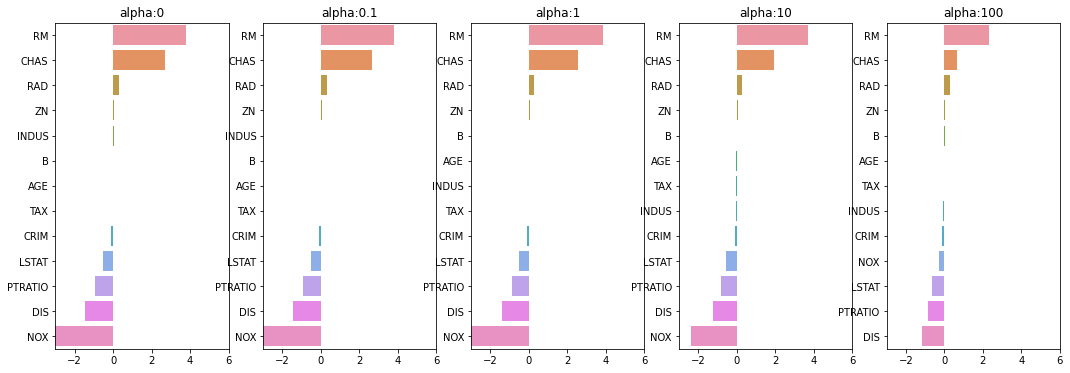

In [16]:
# 각 alpha에 따른 회기 계수 값을 시각화하기 위해 5개의 열로 된 matplotlib 축 생성
fig, axs = plt.subplots(figsize = (18,6), nrows=1, ncols=5)

# 각 alpha에 따른 회기 계수 값을 데이터로 저장하기 위한 DataFrame 생성
coeff_df = pd.DataFrame()

# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos, alpha in enumerate(alphas) :
    ridge = Ridge(alpha = alpha)
    ridge.fit(x_data, y_target)
    #alpha에 따른 피처별로 회귀 계수를 Series로 변환하고 이를 DataFrame의 칼럼으로 추가
    coeff = pd.Series(data=ridge.coef_, index=x_data.columns)
    colname = 'alpha:' + str(alpha)
    coeff_df[colname] = coeff

    # 막대 그래프로 각 alpha 값에서 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3, 6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])
plt.show()

In [17]:
ridge_alphas = [0,0.1,1,10,100]
sort_column = 'alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

alpha:0  alpha:0.1    alpha:1  alpha:10  alpha:100
RM        3.809865   3.818233   3.854000  3.702272   2.334536
CHAS      2.686734   2.670019   2.552393  1.952021   0.638335
RAD       0.306049   0.303515   0.290142  0.279596   0.315358
ZN        0.046420   0.046572   0.047443  0.049579   0.054496
INDUS     0.020559   0.015999  -0.008805 -0.042962  -0.052826
B         0.009312   0.009368   0.009673  0.010037   0.009393
AGE       0.000692  -0.000269  -0.005415 -0.010707   0.001212
TAX      -0.012335  -0.012421  -0.012912 -0.013993  -0.015856
CRIM     -0.108011  -0.107474  -0.104595 -0.101435  -0.102202
LSTAT    -0.524758  -0.525966  -0.533343 -0.559366  -0.660764
PTRATIO  -0.952747  -0.940759  -0.876074 -0.797945  -0.829218
DIS      -1.475567  -1.459626  -1.372654 -1.248808  -1.153390
NOX     -17.766611 -16.684645 -10.777015 -2.371619  -0.262847

In [18]:
from sklearn.linear_model import Lasso, ElasticNet

In [23]:
# alpha 값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환
def get_linear_reg_eval(model_name, params=None, X_data_n = None, y_target_n=None, verbose=True):
    coeff_df = pd.DataFrame()
    if verbose : print('####### ', model_name, '#######')
    for param in params:
        if model_name =='Ridge':
            model = Ridge(alpha=param)
        elif model_name == 'Lasso':
            model = Lasso(alpha=param)
        elif model_name == 'ElasticNet':
            model = ElasticNet(alpha=param, l1_ratio=0.7)
        
        neg_mse_scores = cross_val_score(model, X_data_n, y_target_n, scoring='neg_mean_squared_error', cv=5)
        rmse_scores = np.sqrt(-1*neg_mse_scores)
        avg_rmse = np.mean(rmse_scores)

        print('alpha가 {}일 때, 5 folds의 평균 RMSE: {:.3f}'.format(param, avg_rmse))

        #cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
        model.fit(X_data_n, y_target_n)

        # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 칼럼으로 추가
        coeff = pd.Series(data=model.coef_, index=X_data_n.columns)
        colname = 'alpha'+str(param)
        coeff_df[colname] = coeff
    return coeff_df

# **라쏘 회기**

In [24]:
lasso_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=x_data, y_target_n=y_target)

#######  Lasso #######
alpha가 0.07일 때, 5 folds의 평균 RMSE: 5.612
alpha가 0.1일 때, 5 folds의 평균 RMSE: 5.615
alpha가 0.5일 때, 5 folds의 평균 RMSE: 5.669
alpha가 1일 때, 5 folds의 평균 RMSE: 5.776
alpha가 3일 때, 5 folds의 평균 RMSE: 6.189


In [25]:
sort_column = 'alpha'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

alpha0.07  alpha0.1  alpha0.5    alpha1    alpha3
RM        3.789725  3.703202  2.498212  0.949811  0.000000
CHAS      1.434343  0.955190  0.000000  0.000000  0.000000
RAD       0.270936  0.274707  0.277451  0.264206  0.061864
ZN        0.049059  0.049211  0.049544  0.049165  0.037231
B         0.010248  0.010249  0.009469  0.008247  0.006510
NOX      -0.000000 -0.000000 -0.000000 -0.000000  0.000000
AGE      -0.011706 -0.010037  0.003604  0.020910  0.042495
TAX      -0.014290 -0.014570 -0.015442 -0.015212 -0.008602
INDUS    -0.042120 -0.036619 -0.005253 -0.000000 -0.000000
CRIM     -0.098193 -0.097894 -0.083289 -0.063437 -0.000000
LSTAT    -0.560431 -0.568769 -0.656290 -0.761115 -0.807679
PTRATIO  -0.765107 -0.770654 -0.758752 -0.722966 -0.265072
DIS      -1.176583 -1.160538 -0.936605 -0.668790 -0.000000

# **엘라스틱넷**

In [26]:
elastic_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df = get_linear_reg_eval('ElasticNet', params=elastic_alphas, X_data_n=x_data, y_target_n=y_target)

#######  ElasticNet #######
alpha가 0.07일 때, 5 folds의 평균 RMSE: 5.542
alpha가 0.1일 때, 5 folds의 평균 RMSE: 5.526
alpha가 0.5일 때, 5 folds의 평균 RMSE: 5.467
alpha가 1일 때, 5 folds의 평균 RMSE: 5.597
alpha가 3일 때, 5 folds의 평균 RMSE: 6.068


In [27]:
sort_column = 'alpha'+str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

alpha0.07  alpha0.1  alpha0.5    alpha1    alpha3
RM        3.574162  3.414154  1.918419  0.938789  0.000000
CHAS      1.330724  0.979706  0.000000  0.000000  0.000000
RAD       0.278880  0.283443  0.300761  0.289299  0.146846
ZN        0.050107  0.050617  0.052878  0.052136  0.038268
B         0.010122  0.010067  0.009114  0.008320  0.007020
AGE      -0.010116 -0.008276  0.007760  0.020348  0.043446
TAX      -0.014522 -0.014814 -0.016046 -0.016218 -0.011417
INDUS    -0.044855 -0.042719 -0.023252 -0.000000 -0.000000
CRIM     -0.099468 -0.099213 -0.089070 -0.073577 -0.019058
NOX      -0.175072 -0.000000 -0.000000 -0.000000 -0.000000
LSTAT    -0.574822 -0.587702 -0.693861 -0.760457 -0.800368
PTRATIO  -0.779498 -0.784725 -0.790969 -0.738672 -0.423065
DIS      -1.189438 -1.173647 -0.975902 -0.725174 -0.031208